In [4]:
!pip install selenium

In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

In [4]:
#Ans3:


In [6]:
driver = webdriver.Chrome()


In [7]:
driver.get('https://images.google.com')


In [15]:
search_bar = driver.find_element(By.NAME, 'q')
keywords = ['fruits', 'cars', 'Machine Learning', 'Guitar', 'Cakes']

In [ ]:
for keyword in keywords:
  search_bar.clear()
  search_bar.send_keys(keyword)
  search_bar.send_keys(Keys.RETURN)

In [10]:
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'rg_i')))

<selenium.webdriver.remote.webelement.WebElement (session="d2778719f5be95402424bbf7a53566ca", element="BAA4F906443C0BAE8E233F6285A5BFFA_element_13")>

In [12]:
image_elements = driver.find_elements(By.CLASS_NAME, 'rg_i')
image_urls = [element.get_attribute('src') for element in image_elements]


Top 10 images for 'cars':











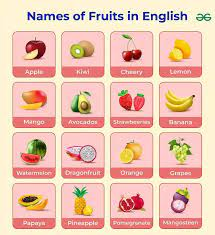
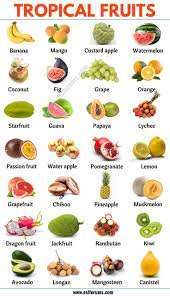
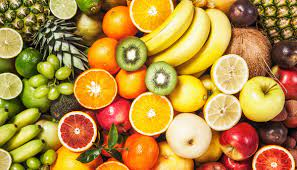
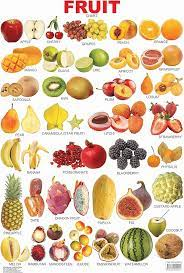
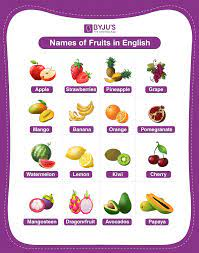
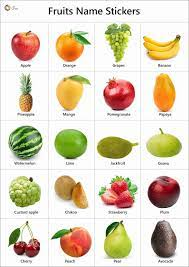
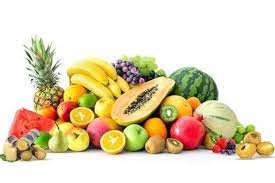
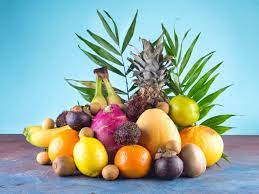
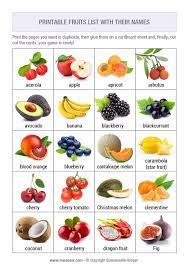
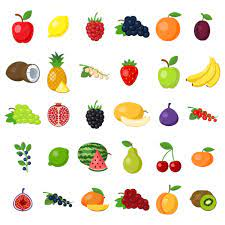

In [16]:
print(f"Top 10 images for '{keyword}':")
for url in image_urls[:10]:
    print(url)
  

In [19]:
#Ans5:

In [6]:
driver = webdriver.Chrome()

In [11]:
driver.get("https://www.google.co.in/maps")

city = input('Enter City Name : ')                                         
search = driver.find_element(By.ID,"searchboxinput")                       
search.clear()                                                            

search.send_keys(city)                                                    
button = driver.find_element(By.ID,"searchbox-searchbutton")               
button.click()                                                             

try:
    url_string = driver.current_url
    print("URL Extracted: ", url_string)
    lat_lng = re.findall(r'@(.*)data',url_string)
    if len(lat_lng):
        lat_lng_list = lat_lng[0].split(",")
        if len(lat_lng_list)>=2:
            lat = lat_lng_list[0]
            lng = lat_lng_list[1]
        print("Latitude = {}, Longitude = {}".format(lat, lng))
except Exception as e:
        print("Error: ", str(e))


Enter City Name : Delhi
URL Extracted:  https://www.google.co.in/maps
Error:  name 're' is not defined


In [ ]:
#Ans6:

In [12]:
driver=webdriver.Chrome()

In [17]:
url="https://www.digit.in/top-products/best-gaming-laptops-40.html"

In [18]:
driver.get(url)

In [30]:
Brands=[]
Specification=[]


In [24]:
br=driver.find_elements(By.XPATH,'//div[@class="list_woo products "]')
len(br)

7

In [25]:
for i in br:
   
    Brands.append(str(i.text).replace("\n",""))
Brands

['HP Omen 17-ck2008TX 13th Gen Core i7-13700HXOperating System:Windows 11 HomeDisplay Size :17.3Resolution :2560 x 1440Processor :13th Gen Intel Core i7-13700HX',
 'MSI GT77 Titan 12UHS-054IN 12th Gen Core i9-12900HX',
 'Lenovo Legion 5i Pro 12th Gen Core i7-12700H (82RF00E1IN)Operating System:Windows 11 HomeDisplay Size :16Resolution :2560 x 1600Processor :12th Gen Intel Core i7-12700H',
 'ASUS ROG Strix Scar 18 G834JZ-N5041WS 13th Gen Core i9-13980HX',
 'Acer Predator Helios Neo 16 13th Gen Core i7-13700HX (PHN16-71)Operating System:Windows 11 HomeDisplay Size :16Resolution :2560 x 1600Processor :13th Gen Intel Core i7-13700HX',
 'ASUS ROG Zephyrus G14 Ryzen 9-6900HS (GA402RJZ-L4136WS)',
 'MSI Cyborg 15 12th Gen Core i7-12650H (A12VF-205IN)']

In [28]:
sp=driver.find_elements(By.XPATH,'//div[@class="rh_gr_middle_desc"]')
len(sp)

7

In [29]:
for i in sp:
   
    Specification.append(str(i.text).replace("\n",""))
Specification

['Operating System:Windows 11 HomeDisplay Size :17.3Resolution :2560 x 1440Processor :13th Gen Intel Core i7-13700HX',
 '',
 'Operating System:Windows 11 HomeDisplay Size :16Resolution :2560 x 1600Processor :12th Gen Intel Core i7-12700H',
 '',
 'Operating System:Windows 11 HomeDisplay Size :16Resolution :2560 x 1600Processor :13th Gen Intel Core i7-13700HX',
 '',
 '']

In [45]:
digit_data=pd.DataFrame([])
digit_data['Brands']=Brands
digit_data['Specification']=Specification
digit_data

,Brands,Specification


In [46]:
#Ans7:


In [48]:
import requests
from bs4 import BeautifulSoup
url = "https://www.forbes.com"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
table = soup.find("table", class_="table")
rows = table.find_all("tr")
for row in rows:
  columns = row.find_all("td")
  rank = columns[0].text.strip()
  name = columns[1].text.strip()
  net_worth = columns[2].text.strip()
  age = columns[3].text.strip()
  citizenship = columns[4].text.strip()
  source = columns[5].text.strip()
  industry = columns[6].text.strip()
  

  print("Rank:", rank)
  print("Name:", name)
  print("Net worth:", net_worth)
  print("Age:", age)
  print("Citizenship:", citizenship)
  print("Source:", source)
  print("Industry:", industry)
  print("--------------------")

AttributeError: 'NoneType' object has no attribute 'find_all'

In [50]:
#Ans8:

In [ ]:
driver = webdriver.Chrome()
video_url = "https://www.youtube.com/results?search_query=kishore+kumar+hit+songs"  
driver.get(video_url)

# Scroll to load comments
scroll_pause_time = 2  # Adjust the pause time as needed
scrolls = 10  # Adjust the number of scrolls as needed

for _ in range(scrolls):
  driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
  time.sleep(scroll_pause_time)

comments = driver.find_elements(By.XPATH,'//yt-formatted-string[@id="content-text"]')
upvotes = driver.find_elements(By.XPATH,'//span[@id="vote-count-middle"]')
times = driver.find_elements(By.XPATH,'//a[@class="yt-simple-endpoint style-scope yt-formatted-string"]')

# Store the extracted data
extracted_data = []
for comment, upvote, time in zip(comments, upvotes, times):
  extracted_data.append({
  'comment': comment.text,
  'upvote': upvote.text,
  'time': time.text
  })
# Print the extracted data
for data in extracted_data:
  print(data)

In [57]:
# Close the WebDriver
driver.quit()


In [58]:
#Ans9:

In [ ]:
import requests
from bs4 import BeautifulSoup

# Send a GET request to the website
url = "https://www.hostelworld.com/hostels/London"
response = requests.get(url)

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find all the hostel listings on the page
hostel_listings = soup.find_all("div", class_="fabresult")

# Iterate over each hostel listing and extract the required information
for hostel in hostel_listings:
  # Extract hostel name
  name = hostel.find("h2", class_="title").text.strip()

  # Extract distance from city centre
  distance = hostel.find("span", class_="distance").text.strip()

  # Extract ratings
  ratings = hostel.find("div", class_="score orange").text.strip()

  # Extract total reviews
  total_reviews = hostel.find("div", class_="reviews").text.strip()

  # Extract overall reviews
  overall_reviews = hostel.find("div", class_="rating").text.strip()

  # Extract privates from price
  privates_price = hostel.find("div", class_="price").text.strip()

  # Extract dorms from price
  dorms_price = hostel.find("div", class_="price dorms").text.strip()

  # Extract facilities
  facilities = [facility.text.strip() for facility in hostel.find_all("span", class_="facilities")]

  # Extract property description
  description = hostel.find("div", class_="desc").text.strip()

  # Print the extracted information
  print("Name:", name)
  print("Distance from city centre:", distance)
  print("Ratings:", ratings)
  print("Total reviews:", total_reviews)
  print("Overall reviews:", overall_reviews)
  print("Privates from price:", privates_price)
  print("Dorms from price:", dorms_price)
  print("Facilities:", facilities)
  print("Description:", description)
  print()


In [59]:
#Ans4:

In [60]:
driver = webdriver.Chrome()
url="https://www.flipkart.com/search?q=smartphone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
driver.get(url)

In [61]:
Brand_Name=[]
Colour=[]
Storage_RAM_ROM=[]
P_F_Camera=[]
Display_size_Resolution=[]
ProcessorAndCores=[]
Battery=[]
Price=[]
Product_URL=[]

In [63]:
BName=driver.find_elements(By.XPATH,'//div[@class="_4rR01T"]')
for i in BName:
    if i.text is None :
        Brand_Name.append("--") 
    else:
        Brand_Name.append(i.text)
print(len(Brand_Name),Brand_Name)

24 ['MOTOROLA g54 5G (Mint Green, 128 GB)', 'SAMSUNG Galaxy F14 5G (OMG Black, 128 GB)', 'MOTOROLA g54 5G (Midnight Blue, 128 GB)', 'SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)', 'APPLE iPhone 14 (Starlight, 128 GB)', 'APPLE iPhone 14 (Midnight, 128 GB)', 'APPLE iPhone 14 (Blue, 128 GB)', 'APPLE iPhone 14 (Purple, 128 GB)', 'MOTOROLA Edge 40 Neo (Caneel Bay, 128 GB)', 'POCO M6 Pro 5G (Power Black, 128 GB)', 'POCO C51 (Royal Blue, 64 GB)', 'OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB)', 'POCO C51 - Locked with Airtel Prepaid (Power Black, 64 GB)', 'POCO C55 (Forest Green, 64 GB)', 'MOTOROLA g54 5G (Pearl Blue, 128 GB)', 'POCO C51 - Locked with Airtel Prepaid (Royal Blue, 64 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)', 'vivo T2x 5G (Marine Blue, 128 GB)', 'MOTOROLA g54 5G (Pearl Blue, 256 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'vivo T2x 5G (Marine Blue, 128 GB)']


In [64]:
ram=driver.find_elements(By.XPATH,"//ul[@class='_1xgFaf']//li[1]")
for i in ram:
    if i.text is None :
        Storage_RAM_ROM.append("--") 
    else:
        Storage_RAM_ROM.append(i.text)
print(len(Storage_RAM_ROM),Storage_RAM_ROM)

24 ['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '6 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '6 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '128 GB ROM', '128 GB ROM', '128 GB ROM', '128 GB ROM', '8 GB RAM | 128 GB ROM', '6 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '6 GB RAM | 128 GB ROM', '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '6 GB RAM | 128 GB ROM', '6 GB RAM | 128 GB ROM', '12 GB RAM | 256 GB ROM | Expandable Upto 1 TB', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '6 GB RAM | 128 GB ROM', '4 GB RAM | 128 GB ROM', '4 GB RAM | 128 GB ROM']


In [65]:
#scraping the P_F_Camera 
PC=driver.find_elements(By.XPATH,"//ul[@class='_1xgFaf']//li[3]")
for i in PC:
    if i.text is None :
        P_F_Camera.append("--") 
    else:
        P_F_Camera.append(i.text)
print(len(P_F_Camera),P_F_Camera)

24 ['50MP (OIS) + 8MP | 16MP Front Camera', '50MP + 2MP | 13MP Front Camera', '50MP (OIS) + 8MP | 16MP Front Camera', '50MP + 2MP | 13MP Front Camera', '12MP + 12MP | 12MP Front Camera', '12MP + 12MP | 12MP Front Camera', '12MP + 12MP | 12MP Front Camera', '12MP + 12MP | 12MP Front Camera', '50MP + 13MP | 32MP Front Camera', '50MP + 2MP | 8MP Front Camera', '8MP Dual Rear Camera | 5MP Front Camera', '64MP Rear Camera | 16MP Front Camera', '8MP Dual Rear Camera | 5MP Front Camera', '50MP Dual Rear Camera | 5MP Front Camera', '50MP (OIS) + 8MP | 16MP Front Camera', '8MP Dual Rear Camera | 5MP Front Camera', '50MP + 2MP | 8MP Front Camera', '50MP + 2MP | 8MP Front Camera', '50MP (OIS) + 8MP | 16MP Front Camera', '50MP + 2MP | 8MP Front Camera', '50MP + 2MP | 8MP Front Camera', '50MP + 2MP | 8MP Front Camera', '50MP + 2MP | 8MP Front Camera', '50MP + 2MP | 8MP Front Camera']


In [66]:
#scraping the Display_size_Resolution 
DS=driver.find_elements(By.XPATH,"//ul[@class='_1xgFaf']//li[2]")
for i in DS:
    if i.text is None :
        Display_size_Resolution.append("--") 
    else:
        Display_size_Resolution.append(i.text)
print(len(Display_size_Resolution),Display_size_Resolution)

24 ['16.51 cm (6.5 inch) Full HD+ Display', '16.76 cm (6.6 inch) Full HD+ Display', '16.51 cm (6.5 inch) Full HD+ Display', '16.76 cm (6.6 inch) Full HD+ Display', '15.49 cm (6.1 inch) Super Retina XDR Display', '15.49 cm (6.1 inch) Super Retina XDR Display', '15.49 cm (6.1 inch) Super Retina XDR Display', '15.49 cm (6.1 inch) Super Retina XDR Display', '16.64 cm (6.55 inch) Full HD+ Display', '17.25 cm (6.79 inch) Full HD+ Display', '16.56 cm (6.52 inch) HD+ Display', '16.74 cm (6.59 inch) Display', '16.56 cm (6.52 inch) HD+ Display', '17.04 cm (6.71 inch) HD+ Display', '16.51 cm (6.5 inch) Full HD+ Display', '16.56 cm (6.52 inch) HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display', '16.51 cm (6.5 inch) Full HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display']


In [67]:
#scraping the ProcessorAndCores 
P=driver.find_elements(By.XPATH,"//ul[@class='_1xgFaf']//li[5]")
for i in P:
    if i.text is None :
        ProcessorAndCores.append("--") 
    else:
        ProcessorAndCores.append(i.text)
print(len(ProcessorAndCores),ProcessorAndCores)

24 ['Dimensity 7020 Processor', 'Exynos 1330, Octa Core Processor', 'Dimensity 7020 Processor', 'Exynos 1330, Octa Core Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories', 'Dimensity 7030 Processor', 'Snapdragon 4 Gen 2 Processor', 'Helio G36 Processor', '12 Months', 'Helio G36 Processor', 'Mediatek Helio G85 Processor', 'Dimensity 7020 Processor', 'Helio G36 Processor', 'Dimensity 6020 Processor', 'Dimensity 6020 Processor', 'Dimensity 7020 Processor', 'Dimensity 6020 Processor', 'Dimensity 6020 Processor', 'Dimensity 6020 Processor', 'Dimensity 6020 Processor', 'Dimensity 6020 Processor']


In [68]:
B=driver.find_elements(By.XPATH,"//ul[@class='_1xgFaf']//li[4]")
for i in B:
    if i.text is None :
        Battery.append("--") 
    else:
        Battery.append(i.text)
print(len(Battery),Battery)

24 ['6000 mAh Battery', '6000 mAh Battery', '6000 mAh Battery', '6000 mAh Battery', 'A15 Bionic Chip, 6 Core Processor Processor', 'A15 Bionic Chip, 6 Core Processor Processor', 'A15 Bionic Chip, 6 Core Processor Processor', 'A15 Bionic Chip, 6 Core Processor Processor', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '6000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '6000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery']


In [69]:
#scraping the Price 
price=driver.find_elements(By.XPATH,"//div[@class='_30jeq3 _1_WHN1']")
for i in price:
    if i.text is None :
        Price.append("--") 
    else:
        Price.append(i.text)
print(len(Price),Price)

24 ['₹13,999', '₹12,490', '₹13,999', '₹12,490', '₹59,999', '₹60,499', '₹58,999', '₹59,999', '₹22,999', '₹11,999', '₹5,999', '₹17,189', '₹5,499', '₹6,499', '₹13,999', '₹5,499', '₹12,999', '₹12,999', '₹15,999', '₹14,999', '₹14,999', '₹12,999', '₹11,999', '₹11,999']


In [70]:
FlipKart=pd.DataFrame([])
FlipKart['Brand_Name']=Brand_Name
FlipKart['Storage_RAM_ROM']=Storage_RAM_ROM
FlipKart['Amount P_F_Camera']=P_F_Camera
FlipKart['Display_size_Resolution']=Display_size_Resolution
FlipKart['ProcessorAndCores']=ProcessorAndCores
FlipKart['Battery']=Battery
FlipKart['Price']=Price

FlipKart

,Brand_Name,Storage_RAM_ROM,Amount P_F_Camera,Display_size_Resolution,ProcessorAndCores,Battery,Price
0,"MOTOROLA g54 5G (Mint Green, 128 GB)",8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP (OIS) + 8MP | 16MP Front Camera,16.51 cm (6.5 inch) Full HD+ Display,Dimensity 7020 Processor,6000 mAh Battery,"₹13,999"
1,"SAMSUNG Galaxy F14 5G (OMG Black, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 2MP | 13MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,"Exynos 1330, Octa Core Processor",6000 mAh Battery,"₹12,490"
2,"MOTOROLA g54 5G (Midnight Blue, 128 GB)",8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP (OIS) + 8MP | 16MP Front Camera,16.51 cm (6.5 inch) Full HD+ Display,Dimensity 7020 Processor,6000 mAh Battery,"₹13,999"
3,"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 2MP | 13MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,"Exynos 1330, Octa Core Processor",6000 mAh Battery,"₹12,490"
4,"APPLE iPhone 14 (Starlight, 128 GB)",128 GB ROM,12MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,1 Year Warranty for Phone and 6 Months Warrant...,"A15 Bionic Chip, 6 Core Processor Processor","₹59,999"
5,"APPLE iPhone 14 (Midnight, 128 GB)",128 GB ROM,12MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,1 Year Warranty for Phone and 6 Months Warrant...,"A15 Bionic Chip, 6 Core Processor Processor","₹60,499"
6,"APPLE iPhone 14 (Blue, 128 GB)",128 GB ROM,12MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,1 Year Warranty for Phone and 6 Months Warrant...,"A15 Bionic Chip, 6 Core Processor Processor","₹58,999"
7,"APPLE iPhone 14 (Purple, 128 GB)",128 GB ROM,12MP + 12MP | 12MP Front Camera,15.49 cm (6.1 inch) Super Retina XDR Display,1 Year Warranty for Phone and 6 Months Warrant...,"A15 Bionic Chip, 6 Core Processor Processor","₹59,999"
8,"MOTOROLA Edge 40 Neo (Caneel Bay, 128 GB)",8 GB RAM | 128 GB ROM,50MP + 13MP | 32MP Front Camera,16.64 cm (6.55 inch) Full HD+ Display,Dimensity 7030 Processor,5000 mAh Battery,"₹22,999"
9,"POCO M6 Pro 5G (Power Black, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,50MP + 2MP | 8MP Front Camera,17.25 cm (6.79 inch) Full HD+ Display,Snapdragon 4 Gen 2 Processor,5000 mAh Battery,"₹11,999"


In [71]:
#ANS1:

In [72]:
driver.get('https://www.amazon.in/')

In [74]:
user_input = input('please enter product here ________')

please enter product here ________Headphones


In [76]:
search_bar = driver.find_element(By.XPATH,'//*[@id="twotabsearchtextbox"]')    
search_bar.send_keys(user_input)       # Inputing keyword to search 
search_button = driver.find_element(By.XPATH,'//*[@id="nav-search-submit-button"]')    
search_button.click()      

In [77]:
productName=[]

In [78]:
PName=driver.find_elements(By.XPATH,"//span[@class='a-size-medium a-color-base a-text-normal']")
for i in PName:
    if i.text is None :
        productName.append("--") 
    else:
        productName.append(i.text)
print(len(productName),productName)

23 ['Samsung Galaxy Buds2 Pro, Bluetooth Truly Wireless in Ear Earbuds with Noise Cancellation (Graphite, with Mic)', 'Sennheiser PC 8.2 Wired On Ear Headphones with Mic (Black)', 'boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)', 'ZEBRONICS Zeb-Bro in Ear Wired Earphones with Mic, 3.5mm Audio Jack, 10mm Drivers, Phone/Tablet Compatible(Blue)', 'JBL Tune 510BT, On Ear Wireless Headphones with Mic, up to 40 Hours Playtime, Pure Bass, Quick Charging, Dual Pairing, Bluetooth 5.0 & Voice Assistant Support for Mobile Phones (Black)', 'Zebronics Zeb-Storm Wired On Ear Headphone with 3.5mm Jack, Built-in Microphone for Calling, 1.5 Meter Cable, Soft Ear Cushion, Adjustable Headband, Foldable Ear Cups and Lightweight Design (Black)', 'Sony WF-1000XM5 Wireless The Best Noise Cancelling Earbuds, Bluetooth, in-Ear Headphones with Microphone, Up to 36 Hours Battery Life and Quick Charge, Works with iOS & Android, Multi-Point - Black', 'ZEBRONICS Zeb-Thunder PRO On-Ear Wireless Headphon

In [79]:
#ANS2:

In [82]:
start_page = 0
end_page = 3
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-no-outline"]')
        
        for url in page_urls:
            url = url.get_attribute('href')     
            if url[0:4]=='http':                
                urls.append(url)                
        print("Product urls of page {} has been scraped.".format(page+1))
        
       
        nxt_button = driver.find_element(By.XPATH,'//li[@class="a-last"]/a')     
        if nxt_button.text == 'Next→':                                            
            nxt_button.click()                                                 
            time.sleep(5)                                                       
         
        elif driver.find_element(By.XPATH,'//li[@class="a-disabled a-last"]/a').text == 'Next→':    
            print("No new pages exist. Breaking the loop") 
            break
            
    except StaleElementReferenceException as e:             
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')       
        driver.get(next_page)   

Product urls of page 1 has been scraped.


NameError: name 'StaleElementReferenceException' is not defined

In [83]:
prod_dict = {}
prod_dict['Brand']=[]
prod_dict['Name']=[]
prod_dict['Rating']=[]
prod_dict['No. of ratings']=[]
prod_dict['Price']=[]
prod_dict['Return/Exchange']=[]
prod_dict['Expected Delivery']=[] 
prod_dict['Availability']=[]
prod_dict['Other Details']=[]
prod_dict['URL']=[]